<a href="https://colab.research.google.com/github/nomchanz/graduation_thesis_new/blob/main/2000_seed(0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## 必要なライブラリのimport
import csv
import random
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, BatchNormalization
from keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
## データについて

### データフイルのpath
no_hole_path = 'no_hole_data.csv'
one_hole_size_path = 'one_hole_size_data.csv'
one_hole_position_path = 'one_hole_position_data.csv'
four_holes_size_path = 'four_holes_size_data.csv'
four_holes_position_path = 'four_holes_position_data.csv'
nine_holes_size_path = 'nine_holes_size_data.csv'
nine_holes_position_path = 'nine_holes_position_data.csv'
sixteen_holes_size_path = 'sixteen_holes_size_data.csv'
sixteen_holes_position_path = 'sixteen_holes_position_data.csv'
twentyfive_holes_size_path = 'twentyfive_holes_size_data.csv'
twentyfive_holes_position_path = 'twentyfive_holes_position_data.csv'

#### 穴0データ
with open(no_hole_path) as f0:
  lst_f0 = list(csv.reader(f0))

#### 大きさに関するデータ
with open(one_hole_size_path) as fs1:
  lst_fs1 = list(csv.reader(fs1))
with open(four_holes_size_path) as fs2:
  lst_fs2 = list(csv.reader(fs2))
with open(nine_holes_size_path) as fs3:
  lst_fs3 = list(csv.reader(fs3))
with open(sixteen_holes_size_path) as fs4:
  lst_fs4 = list(csv.reader(fs4))
with open(twentyfive_holes_size_path) as fs5:
  lst_fs5 = list(csv.reader(fs5))

#### 位置に関するデータ
with open(one_hole_position_path) as fp1:
  lst_fp1 = list(csv.reader(fp1))
with open(four_holes_position_path) as fp2:
  lst_fp2 = list(csv.reader(fp2))
with open(nine_holes_position_path) as fp3:
  lst_fp3 = list(csv.reader(fp3))
with open(sixteen_holes_position_path) as fp4:
  lst_fp4 = list(csv.reader(fp4))
with open(twentyfive_holes_position_path) as fp5:
  lst_fp5 = list(csv.reader(fp5))

n = 2000
a = 0

random.seed(a)

lst_fs1 = random.sample(lst_fs1, int(n/5))
lst_fs2 = random.sample(lst_fs2, int(n/5))
lst_fs3 = random.sample(lst_fs3, int(n/5))
lst_fs4 = random.sample(lst_fs4, int(n/5))
lst_fs5 = random.sample(lst_fs5, int(n/5))
lst_fp1 = random.sample(lst_fp1, int(n/5))
lst_fp2 = random.sample(lst_fp2, int(n/5))
lst_fp3 = random.sample(lst_fp3, int(n/5))
lst_fp4 = random.sample(lst_fp4, int(n/5))
lst_fp5 = random.sample(lst_fp5, int(n/5))

lst_f0 = [r[:-1] for r in lst_f0]
lst_x_fs1 = [r[0] for r in lst_fs1]
lst_x_fs2 = [r[0] for r in lst_fs2]
lst_x_fs3 = [r[0] for r in lst_fs3]
lst_x_fs4 = [r[0] for r in lst_fs4]
lst_x_fs5 = [r[0] for r in lst_fs5]
lst_x_fp1 = [r[0] for r in lst_fp1]
lst_x_fp2 = [r[0] for r in lst_fp2]
lst_x_fp3 = [r[0] for r in lst_fp3]
lst_x_fp4 = [r[0] for r in lst_fp4]
lst_x_fp5 = [r[0] for r in lst_fp5]
lst_y1 = [r[1:-1] for r in lst_fp1]
lst_y2 = [r[1:-1] for r in lst_fp2]
lst_y3 = [r[1:-1] for r in lst_fp3]
lst_y4 = [r[1:-1] for r in lst_fp4]
lst_y5 = [r[1:-1] for r in lst_fp5]

lst_x_fs = lst_x_fs1 + lst_x_fs2 + lst_x_fs3 + lst_x_fs4 + lst_x_fs5
lst_x_fp = lst_x_fp1 + lst_x_fp2 + lst_x_fp3 + lst_x_fp4 + lst_x_fp5
lst_x = lst_x_fs + lst_x_fp
lst_y = lst_y1 + lst_y2 + lst_y3 + lst_y4 + lst_y5

lst_f0 = np.array(lst_f0, dtype=float)
lst_x = np.array(lst_x, dtype=int)
lst_y = np.array(lst_y, dtype=float)

lst_x = lst_x.reshape(2,n)
lst_x = lst_x.T
lst_y = lst_y - lst_f0

### train用とtest用に分割(4:1)
x_train, x_test, y_train, y_test = train_test_split(lst_x, lst_y, train_size= 0.8, test_size=0.2)

x_train = x_train.reshape(int(n*0.8),2,1)
x_test = x_test.reshape(int(n*0.2),2,1)

In [ ]:
x_train

array([[[ 1],
        [13]],

       [[ 2],
        [21]],

       [[ 2],
        [ 4]],

       ...,

       [[ 4],
        [13]],

       [[ 5],
        [ 4]],

       [[ 2],
        [ 8]]])

In [ ]:
## CNN

### modelの作成
model = Sequential()
### 畳み込み層
model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(2, 1)))
### プーリング層
model.add(MaxPooling1D(2, padding='same'))
### 全結合層
model.add(Dense(50, activation='linear'))
### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
model.compile(loss='mse', optimizer=adam, metrics=['mae'])

In [ ]:
# 学習
epochs = 4000
batch_size = 64
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

ストリーミング出力は最後の 5000 行に切り捨てられました。
Epoch 1501/4000
25/25 [==============================] - 0s 6ms/step - loss: 0.3241 - mae: 0.2309 - val_loss: 0.3898 - val_mae: 0.2536
Epoch 1502/4000
25/25 [==============================] - 0s 7ms/step - loss: 0.3505 - mae: 0.2359 - val_loss: 0.3898 - val_mae: 0.2536
Epoch 1503/4000
25/25 [==============================] - 0s 5ms/step - loss: 0.4170 - mae: 0.2399 - val_loss: 0.3898 - val_mae: 0.2536
Epoch 1504/4000
25/25 [==============================] - 0s 5ms/step - loss: 0.3644 - mae: 0.2428 - val_loss: 0.3898 - val_mae: 0.2536
Epoch 1505/4000
25/25 [==============================] - 0s 5ms/step - loss: 0.3422 - mae: 0.2419 - val_loss: 0.3897 - val_mae: 0.2535
Epoch 1506/4000
25/25 [==============================] - 0s 5ms/step - loss: 0.3638 - mae: 0.2322 - val_loss: 0.3898 - val_mae: 0.2535
Epoch 1507/4000
25/25 [==============================] - 0s 5ms/step - loss: 0.3363 - mae: 0.2383 - val_loss: 0.3898 - val_mae: 0.2536
Epoch 1508/4000
25/25 [

In [ ]:
# モデルの評価
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

13/13 [==============================] - 0s 2ms/step - loss: 0.3897 - mae: 0.2535
Test loss: 0.389714777469635
Test mae: 0.25349536538124084


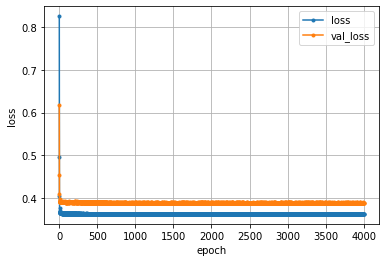

In [ ]:
# 学習経過の可視化
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
for i in range(900):
  if max(loss)>2: 
    loss = loss[1:]
    val_loss = val_loss[1:]
  else:
    plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

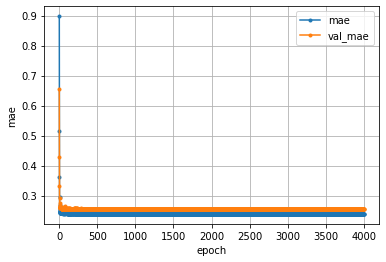

In [ ]:
# 学習経過の可視化
mae     = history.history['mae']
val_mae = history.history['val_mae']

nb_epoch = len(mae)
for i in range(900):
  if max(mae)>2: 
    mae = mae[1:]
    val_mae = val_mae[1:]
  else:
    plt.plot(range(i,nb_epoch), mae,     marker='.', label='mae')
    plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

In [ ]:
model.save(str(n)+"_random.seed("+str(a)+").h5")

In [ ]:
## CNN

### modelの作成
model_BN = Sequential()
### 畳み込み層
model_BN.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(2, 1)))
### プーリング層
model_BN.add(MaxPooling1D(2, padding='same'))
### 全結合層
model_BN.add(Dense(50, activation='linear'))
### バッチ正規化層
model_BN.add(BatchNormalization(epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
model_BN.compile(loss='mse', optimizer=adam, metrics=['mae'])

In [ ]:
# 学習
epochs = 4000
batch_size = 64
history = model_BN.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

ストリーミング出力は最後の 5000 行に切り捨てられました。
Epoch 1501/4000
25/25 [==============================] - 0s 5ms/step - loss: 0.3063 - mae: 0.2283 - val_loss: 0.3898 - val_mae: 0.2535
Epoch 1502/4000
25/25 [==============================] - 0s 11ms/step - loss: 0.3309 - mae: 0.2447 - val_loss: 0.3898 - val_mae: 0.2536
Epoch 1503/4000
25/25 [==============================] - 0s 7ms/step - loss: 0.3073 - mae: 0.2292 - val_loss: 0.3898 - val_mae: 0.2535
Epoch 1504/4000
25/25 [==============================] - 0s 5ms/step - loss: 0.4203 - mae: 0.2555 - val_loss: 0.3898 - val_mae: 0.2536
Epoch 1505/4000
25/25 [==============================] - 0s 5ms/step - loss: 0.3701 - mae: 0.2422 - val_loss: 0.3898 - val_mae: 0.2536
Epoch 1506/4000
25/25 [==============================] - 0s 6ms/step - loss: 0.2493 - mae: 0.2222 - val_loss: 0.3898 - val_mae: 0.2536
Epoch 1507/4000
25/25 [==============================] - 0s 5ms/step - loss: 0.3755 - mae: 0.2467 - val_loss: 0.3898 - val_mae: 0.2536
Epoch 1508/4000
25/25 

In [ ]:
# モデルの評価
score = model_BN.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

13/13 [==============================] - 0s 2ms/step - loss: 0.3898 - mae: 0.2536
Test loss: 0.38981857895851135
Test mae: 0.2535598576068878


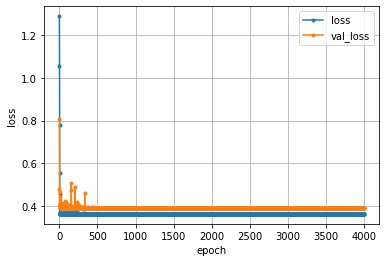

In [ ]:
# 学習経過の可視化
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
for i in range(900):
  if max(loss)>2: 
    loss = loss[1:]
    val_loss = val_loss[1:]
  else:
    plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

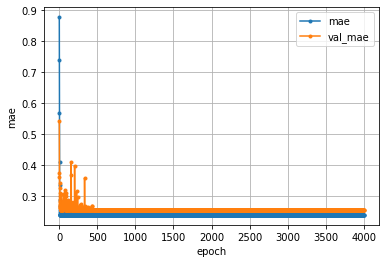

In [ ]:
# 学習経過の可視化
mae     = history.history['mae']
val_mae = history.history['val_mae']

nb_epoch = len(mae)
for i in range(900):
  if max(mae)>2: 
    mae = mae[1:]
    val_mae = val_mae[1:]
  else:
    plt.plot(range(i,nb_epoch), mae,     marker='.', label='mae')
    plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

In [ ]:
model_BN.save(str(n)+"_random.seed("+str(a)+")_BN.h5")

In [ ]:
## CNN

### modelの作成
model_2 = Sequential()
### 畳み込み層
model_2.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(2, 1)))
### プーリング層
model_2.add(MaxPooling1D(2, padding='same'))
### 平滑化層
model_2.add(Flatten())
### 全結合層
model_2.add(Dense(50, activation='linear'))
### バッチ正規化層
model_2.add(BatchNormalization(epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
model_2.compile(loss='mse', optimizer=adam, metrics=['mae'])

In [ ]:
# 学習
epochs = 4000
batch_size = 64
history = model_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

ストリーミング出力は最後の 5000 行に切り捨てられました。
Epoch 1501/4000
25/25 [==============================] - 0s 4ms/step - loss: 0.2615 - mae: 0.1831 - val_loss: 0.2659 - val_mae: 0.2265
Epoch 1502/4000
25/25 [==============================] - 0s 4ms/step - loss: 0.2379 - mae: 0.1811 - val_loss: 0.2695 - val_mae: 0.2307
Epoch 1503/4000
25/25 [==============================] - 0s 4ms/step - loss: 0.2103 - mae: 0.1697 - val_loss: 0.2508 - val_mae: 0.1864
Epoch 1504/4000
25/25 [==============================] - 0s 3ms/step - loss: 0.1791 - mae: 0.1685 - val_loss: 0.2545 - val_mae: 0.1954
Epoch 1505/4000
25/25 [==============================] - 0s 4ms/step - loss: 0.1725 - mae: 0.1600 - val_loss: 0.2570 - val_mae: 0.2092
Epoch 1506/4000
25/25 [==============================] - 0s 4ms/step - loss: 0.1910 - mae: 0.1708 - val_loss: 0.2651 - val_mae: 0.2193
Epoch 1507/4000
25/25 [==============================] - 0s 4ms/step - loss: 0.1964 - mae: 0.1724 - val_loss: 0.2574 - val_mae: 0.2053
Epoch 1508/4000
25/25 [

In [ ]:
# モデルの評価
score = model_2.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

13/13 [==============================] - 0s 1ms/step - loss: 0.2386 - mae: 0.1779
Test loss: 0.23864085972309113
Test mae: 0.17792652547359467


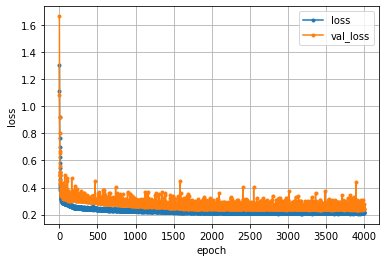

In [ ]:
# 学習経過の可視化
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
for i in range(900):
  if max(loss)>2: 
    loss = loss[1:]
    val_loss = val_loss[1:]
  else:
    plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

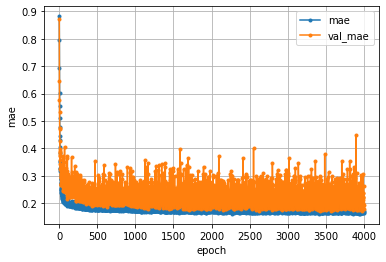

In [ ]:
# 学習経過の可視化
mae     = history.history['mae']
val_mae = history.history['val_mae']

nb_epoch = len(mae)
for i in range(900):
  if max(mae)>2: 
    mae = mae[1:]
    val_mae = val_mae[1:]
  else:
    plt.plot(range(i,nb_epoch), mae,     marker='.', label='mae')
    plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

In [ ]:
model_2.save(str(n)+"_random.seed("+str(a)+")_2.h5")